maptiles
===========
Create map images and use as plot background.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Illustrative examples

### Map image on matplotlib axes

- `draw_map((lon1, lat1, lon2, lat2))` draws map image on the rectangle area on the matplotlib figure axes.
- After drawing the map, one can add visualizations using the matplotlib features.

**Remarks:**

- Longitude and latitudes must be given in angles. Internally longitudes are converted to `[-180 to 180)` scale. Latitudes must be in `[-L, L]` with `L=85.0511287798`. This `L` is the north and south limit of Web Mercator projection.
- Zoom level is automatically chosen by heuristic calculation. The `z` option allows for explicit specification.
- Aspect ratio is automatically adjusted by heuristic calculation. The `aspect` option allows for explicit specification.
- If `ax` is not given, then new axes is created internally.

Zoom level 18 is chosen


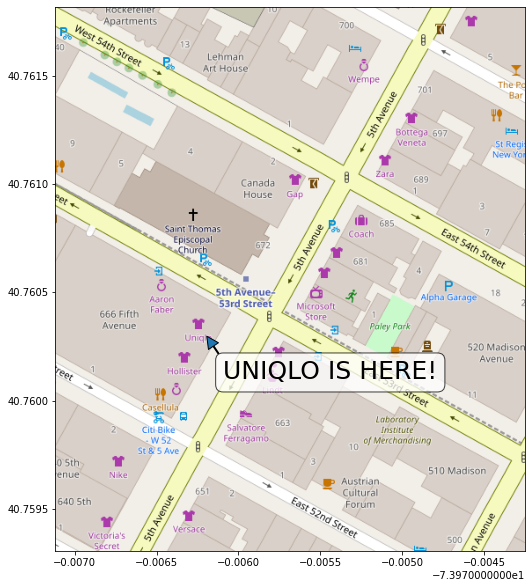

In [2]:
from maptiles import draw_map

# 5th Avenue in Manhattan, New York
bounds = [286.02288365364075, 40.761816905893156, 286.0257428884506, 40.7593098808893]
fig, ax = plt.subplots(figsize=(10, 10))
draw_map(bounds, ax=ax)

uniqlo = [286.02380633354187, 40.76029726182907]
uniqlo[0] -= 360
arrow_from = uniqlo[0] + 0.0001, uniqlo[1] - 0.0002
ax.annotate("UNIQLO IS HERE!", uniqlo, xytext=arrow_from, fontsize=25,
            bbox={"facecolor": "white", "alpha":0.75, "boxstyle":"round"}, arrowprops={"width":1})
None

Zoom level 17 is chosen


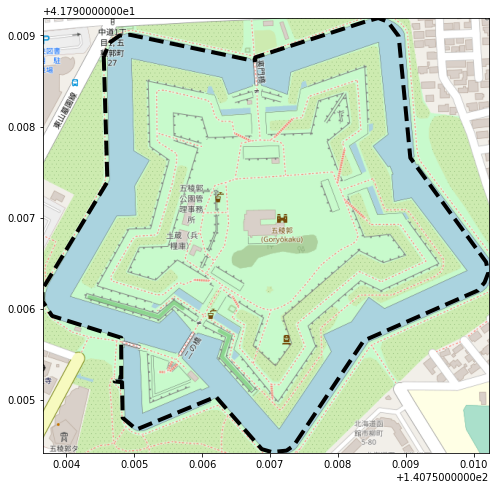

In [3]:
# Goryokaku Castle in Hokkaido, Japan
goryokaku = [[140.7545506954193, 41.79877552882002], [140.7546043395996, 41.797391817910004], [140.7536494731903, 41.7962160400744],
             [140.7536494731903, 41.79608006437536], [140.75378894805905, 41.79592009259535], [140.75480818748474, 41.79568013417667],
             [140.75480818748474, 41.79524020807576], [140.75473308563232, 41.79524820675909], [140.7547116279602, 41.79520021464413],
             [140.7548189163208, 41.79519221595479], [140.75482964515686, 41.7948002789552], [140.755033493042, 41.79467229900768],
             [140.75620293617249, 41.79503224195874], [140.75687885284424, 41.794456332266776], [140.75702905654907, 41.79442433713216],
             [140.75724363327026, 41.79444033470147], [140.75735092163086, 41.79449632616259], [140.75838088989255, 41.795648139652975],
             [140.76006531715393, 41.79620004294831], [140.76016187667847, 41.796288027092395], [140.76021552085876, 41.79639200819787],
             [140.7601833343506, 41.79651198618687], [140.75906753540036, 41.7976557650716], [140.75889587402344, 41.79899148100668],
             [140.75873494148254, 41.79915144512023], [140.75859546661377, 41.79919143608624], [140.7584023475647, 41.79915144512023],
             [140.7567822933197, 41.798759532332795], [140.7567822933197, 41.79872753934637], [140.75671792030334, 41.79872753934637],
             [140.75493693351746, 41.79900747743603], [140.75478672981262, 41.79899947922184], [140.75464725494385, 41.798927495249465],
             [140.7545506954193, 41.79877552882002]]
lons, lats = zip(*goryokaku)
bounds = min(lons), max(lats), max(lons), min(lats)
fig, ax = plt.subplots(figsize=(8, 8))
draw_map(bounds, ax=ax)

ax.plot(lons, lats, c="black", linewidth=4, linestyle="dashed")
None

Zoom level 15 is chosen


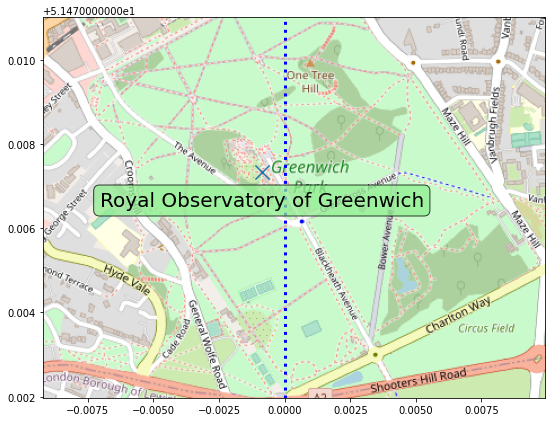

In [4]:
# Royal observatory of Greenwich
bounds = (-0.0092, 51.481, 0.0099, 51.472)
fig, ax = plt.subplots(figsize=(9, 9))
draw_map(bounds, ax=ax)

observatory = (-0.0008717179298400879, 51.47732699342673)
ax.scatter(*observatory, marker="x", s=200)
ax.axvline(x=0, linestyle="dotted", linewidth=3, c="blue")
ax.text(observatory[0], observatory[1]-0.0008, "Royal Observatory of Greenwich", ha="center",
        fontsize=20, bbox={"facecolor":"lightgreen", "alpha":0.75, "boxstyle":"round"})
None

## Obtain the image data as array

- `get_maparray((lon1, lat1, lon2, lat2))` returns:
    - The RGB image data as numpy array of shape (height, height, 3).
    - Tuple of `(xmin, xmax, ymin, ymax)` defining the area covered by the image.

Zoom level 15 is chosen


(338, 446, 3)
(-0.009226799011230469, 0.009913444519042969, 51.47197425351905, 51.48100872578421)


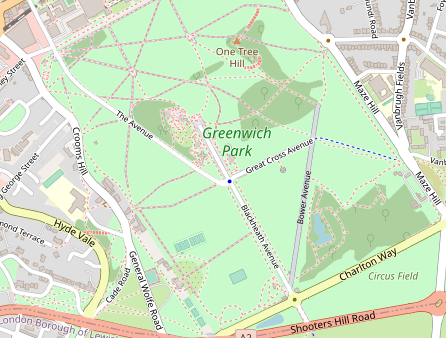

In [5]:
from maptiles import get_maparray
# Royal observatory of Greenwich, again
bounds = (-0.0092, 51.481, 0.0099, 51.472)
img, extent = get_maparray(bounds)

print(img.shape)
print(extent)

Image.fromarray(img)

## Tiles

### Predefined tiles

- This package defines a number of map tiles for the convenience.
- The available tiles are given by the `predefined_tiles` function.
- These names can be used as the `tile` option of the `draw_map` and `get_maparray` functions.

In [6]:
from maptiles import predefined_tiles

list(predefined_tiles().keys())

['osm',
 'osm_bw',
 'osm_tonner',
 'osm_tonner_hybrid',
 'osm_tonner_labels',
 'osm_tonner_lines',
 'osm_tonner_backgrounds',
 'osm_tonner_lite',
 'japangsi',
 'japangsi_pale',
 'japangsi_blank',
 'google',
 'google_roads',
 'google_streets',
 'google_terrain',
 'google_satellite',
 'google_satellite_hybrid',
 'google_h',
 'google_r',
 'google_t',
 'google_s',
 'google_y']

Zoom level 15 is chosen


SSLError: HTTPSConnectionPool(host='mt1.google.com', port=443): Max retries exceeded with url: /vt/lyrs=h&x=16383&y=10900&z=15 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)')))

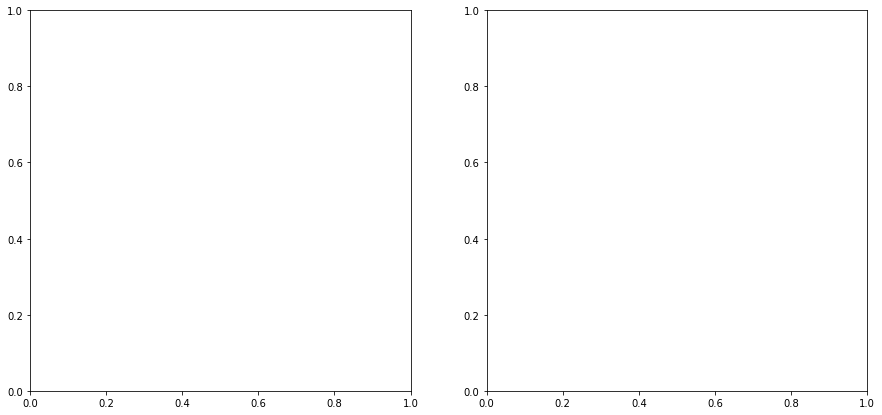

In [16]:
# Royal observatory of Greenwich, again
bounds = (-0.0092, 51.481, 0.0099, 51.472)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
draw_map(bounds, ax=ax[0], tile="google")
ax[0].set_title("Google Map")
draw_map(bounds, ax=ax[1], tile="osm_bw")
ax[1].set_title("OpenStreetMap Black&White")
fig.tight_layout()
None

### Custom tiles

- Other tiles can be specified by a URL string with `{x}`, `{y}`, `{z}` parameters.

Zoom level 11 is chosen
Zoom level 11 is chosen


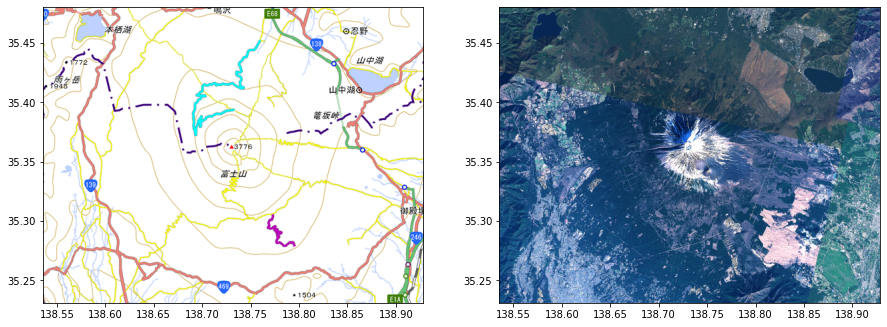

In [9]:
# Mount Fuji, Japan
bounds = [138.53553771972656, 35.48024245154482, 138.9276123046875, 35.231598543453316]
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

draw_map(bounds, ax=ax[0], tile="japangsi")

url = "https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg"
draw_map(bounds, ax=ax[1], tile=url)

## Implementation details

### Database

- Downloaded image data are stored at the internal SQLite database at `config.dbfile`. The default location is `~/maptiles.db`.
- By reusing the stored images, we reduce the number of requests to the map tile servers.
- If you want to delete existing data, either run `initialize_database(replace=True)` or simply delete the file.
- One may change the database file location by the `set_databasefile` function.

In [15]:
import sqlite3
from maptiles import config, set_databasefile

# The database has only one table "tiles"
#   with columns "url" and "image".
with sqlite3.connect(config.dbfile) as conn:
    c = conn.cursor()
    data = c.execute("SELECT url FROM tiles LIMIT 10").fetchall()
print(data)

[('https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/11/1812/807.jpg',), ('https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/11/1812/808.jpg',), ('https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/11/1812/809.jpg',), ('https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/11/1813/807.jpg',), ('https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/11/1813/808.jpg',), ('https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/11/1813/809.jpg',), ('https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/11/1814/807.jpg',), ('https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/11/1814/808.jpg',), ('https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/11/1814/809.jpg',), ('https://cyberjapandata.gsi.go.jp/xyz/std/11/1812/807.png',)]


In [12]:
# Change the database location
set_databasefile("./temp.db")
print(config.dbfile)

19880 -rw-r--r--  1 km255052  staff   9.6M Oct  8 17:51 /Users/km255052/maptiles.db
    0 -rw-r--r--  1 km255052  staff     0B Feb  9  2021 /Users/km255052/sl_temp.db
 6272 -rw-r--r--  1 km255052  staff   2.9M Oct  6 19:34 /Users/km255052/tilemapbase_cache.db
